<a href="https://colab.research.google.com/github/aceeesz/Emerging-Technologies-2-in-CpE/blob/main/Ass_5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment 5.2: Build and Apply Multilayer Perceptron**


**Group 15 - BSCPE32S1**


- Efa, Christian Ed
- Sierra, Charls Ryan

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Importing data
data = pd.read_csv('/content/data.csv')
del data['Unnamed: 32']

In [ ]:
X = data.iloc[:, 2:].values
y = data.iloc[:, 1].values

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Creating a sequential model
classifier = Sequential()

# Adding an input layer with 30 dimensions (assuming 30 input features)
# and 16 hidden units, with uniform initialization and ReLU activation
classifier.add(Dense(units=16, kernel_initializer='uniform', activation='relu', input_dim=30))

# Adding dropout to prevent overfitting
classifier.add(Dropout(rate=0.1))

# Adding a hidden layer with 16 hidden units, with uniform initialization and ReLU activation
classifier.add(Dense(units=16, kernel_initializer='uniform', activation='relu'))

# Adding dropout to prevent overfitting
classifier.add(Dropout(rate=0.1))

# Adding an output layer with a single unit (assuming binary classification)
# and sigmoid activation
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Compiling the model using binary cross-entropy loss and Adam optimizer
classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model with the training data
# classifier.fit(x_treinamento, y_treinamento, epochs=100, batch_size=10)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
pip install --upgrade keras

In [ ]:
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size=100, epochs=150)
# Long scroll ahead but worth
# The batch size and number of epochs have been set using trial and error.

Epoch 1/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5349 - loss: 0.6929
Epoch 2/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6516 - loss: 0.6913 
Epoch 3/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6866 - loss: 0.6893 
Epoch 4/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8083 - loss: 0.6856 
Epoch 5/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8649 - loss: 0.6792 
Epoch 6/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9220 - loss: 0.6686 
Epoch 7/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9266 - loss: 0.6530 
Epoch 8/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9350 - loss: 0.6292
Epoch 9/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9329 - loss: 0.6021 
Epoch 10/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9219 - loss: 0.5628 
Epoch 11/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9486 - loss: 0.5232 
Epoch 12/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9437 - loss

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


Our accuracy is 98.24561403508771%


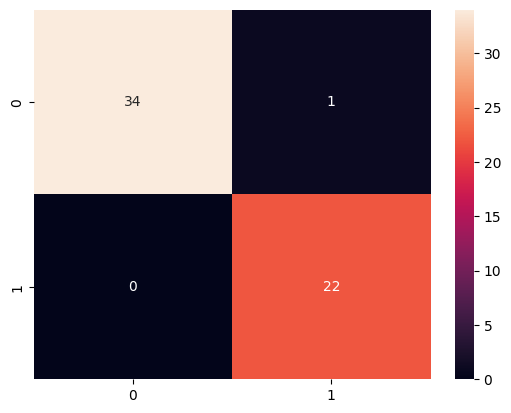

In [ ]:
# prints the accuracy of the classification model. It calculates the accuracy by dividing the sum of true positives
print("Our accuracy is {}%".format(((cm[0][0] + cm[1][1])/57)*100))

#creates a heatmap visualization of the confusion matrix using the Seaborn library
sns.heatmap(cm,annot=True)
#saves the generated heatmap as an image file named 'h.png' in the current directory.
plt.savefig('h.png')

**Choose any dataset**
- We have chosen about Breast Cancer Wisconsin (Diagnostic)

**Explain the problem you are trying to solve**
- Data Set Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei


**Create your own model**
- We Have created a model with a 98% accuracy using Sigmoid function used when dealing with classfication problems with 2 types of results. Optimizer is chosen as adam for gradient descent.


**Evaluate the accuracy of your model**
-   the batch size and number of epochs, trial and error is a common approach that we have took in order to gain a high accuracy outcome such as 98.24561403508771%